In [48]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [107]:
df = pd.read_csv('C:/Users/davin/Downloads/서울시강서구안심이CCTV연계현황.csv', encoding='cp949')
df

,자치구,안심 주소,위도,경도,CCTV 수량,수정 일시,Unnamed: 6
0,강서구,(공사중)C231003(A1069)_염창동 280-21,37.5486,126.8712,1,2022-12-01,NaN
1,강서구,(교체예정) C181022(SC121) - 마곡중앙5로 마곡중학교 맞은편,37.5670,126.8219,1,2022-12-01,NaN
2,강서구,(교체예정) S312010_화곡본동 748-24 화일초등학교 병설유치원,37.5405,126.8480,1,2022-12-01,NaN
3,강서구,(교체예정)C181011(SC131) - 마곡중앙로 국제업무단지 CP2앞(보조1),37.5634,126.8271,1,2022-12-01,NaN
4,강서구,(교체예정)C181026(SC106) - 마곡서1로 8단지 공원부지앞 삼거리,37.5651,126.8193,1,2022-12-01,NaN
...,...,...,...,...,...,...,...
3205,강서구,쉼터318001 사회적거리등(화곡동 56-3한글어린이공원) (라이브),37.5386,126.8503,1,2022-12-01,NaN
3206,강서구,어린이체험관 - 카메라 1,37.5706,126.8172,1,2022-12-01,NaN
3207,강서구,어린이체험관(2F),37.5706,126.8171,1,2022-12-01,NaN
3208,강서구,어린이체험관(4F),37.5707,126.8171,1,2022-12-01,NaN


In [125]:
addr = df['안심 주소']

def cateAddr(addr):
    addr_distinct = []
    for i in range(len(addr)):
        new = addr[i].replace(' ',',').replace('(',',').replace(')',',').replace('_',',')
        addr_list = new.split(',')
#         print(addr_list)
        for j in range(len(addr_list)):
            if "동" == addr_list[j][-1:] or "로" == addr_list[j][-1:]:
                addr_distinct.append(addr_list[j])
    return addr_distinct
            
addr_distinct = sorted(list(set(cateAddr(addr))))
addr_distinct
# len(addr_distinct)

['-마곡중앙로',
 '101동',
 '102동',
 '103동',
 '105동',
 '106동',
 '1101동',
 '111동',
 '301동',
 '406동',
 '407동',
 '408동',
 '501동',
 '502동',
 '515동',
 '5동-7동',
 '602동',
 '712동',
 '714동',
 'C251044[경찰방범]화곡1동',
 'CNS동',
 'I206002-방화1동',
 'I266001-화곡2동',
 'S242005-우장산동',
 'S4/5동',
 '[체납]화곡6동',
 '[체납]화곡본동',
 '가로공원로',
 '가양1동',
 '가양2동',
 '가양3동',
 '가양동',
 '가양초교앞교차로',
 '강서로',
 '개화동',
 '개화동로',
 '고속도로',
 '곰달래로',
 '공항대로',
 '공항동',
 '공항로',
 '공행대로',
 '교차로',
 '구도로',
 '국회대로',
 '금낭화로',
 '까치산로',
 '남부순환로',
 '내발산동',
 '대로',
 '동부간선수로',
 '등촌1동',
 '등촌2동',
 '등촌3동',
 '등촌동',
 '등촌로',
 '마곡15단지1502동',
 '마곡동',
 '마곡동로',
 '마곡서1로',
 '마곡서로',
 '마곡수명산파크1단지116동',
 '마곡중앙10로',
 '마곡중앙1로',
 '마곡중앙2로',
 '마곡중앙3로',
 '마곡중앙5로',
 '마곡중앙6로',
 '마곡중앙8로',
 '마곡중앙로',
 '마곡중앙로1로',
 '마곡중앙로8로',
 '마동',
 '발산1동',
 '발산2동',
 '발산동',
 '발산로',
 '방화1동',
 '방화2동',
 '방화3동',
 '방화대로',
 '방화동',
 '방화동로',
 '보조줌2통학로',
 '산책로',
 '상가동',
 '신안빌라1동',
 '알베로',
 '양천로',
 '연결통로',
 '염창근린공원진입로',
 '염창동',
 '올림픽대로',
 '외발산동',
 '우장산동',
 '우장산로',
 '우장산아이파트129동',
 '월정로',
 '진입로',
 '초록마을로',
 '초원로',

In [121]:
fix_cam_addr = []
cam_addr = []
category = ['공사중', '예정', '수리', '철거', '고장']
for i in range(len(addr)):
    for j in range(len(category)):
        if category[j] in addr[i]:
            fix_cam_addr.append(addr[i])
        else:
            cam_addr.append(addr[i])
            
print(fix_cam_addr)
print(cam_addr)

['(공사중)C231003(A1069)_염창동 280-21', '(교체예정) C181022(SC121) - 마곡중앙5로 마곡중학교 맞은편', '(교체예정) S312010_화곡본동 748-24 화일초등학교 병설유치원', '(교체예정)C181011(SC131) - 마곡중앙로 국제업무단지 CP2앞(보조1)', '(교체예정)C181026(SC106) - 마곡서1로 8단지 공원부지앞 삼거리', '(교체예정)C181046(SC212) - 공항대로 국제업무단지 C6 앞', '(교체예정)P183019(SC공원22) - 공항대로 마곡역 우측 연결녹지22호 내(보조1줌)', '(노후교체예정)I116001_가양동 97-8 (CJ한길자동차 매매단지)', '(분기점철거)C231014_염창동 279-12(고정1) - 공항대로59다길 방향', '(설치예정)C181007(SC129) - 마곡동 727-709 마곡역 앞(보조1)', '(성능개선교체예정)C161002(A1023)_등촌2동 365-105', '(성능개선교체예정)C161004(A1025)_등촌2동 366-11', '(성능개선교체예정)C281004(A1100)_화곡4동 790-6', '(성능개선교체예정)C291004(A1119)_화곡6동 958-18', '(성능개선교체예정)C311002(A1135)_화곡본동 102-66', '(성능개선교체예정)C311003_화곡본동 105-239', '(성능개선교체예정)C311004(A1137)_화곡본동 105-207', '(성능개선교체예정)C311005(A1138)_화곡본동 24-144', '(성능개선예정)C141010(A1015)_공항동 672-2', '(성능개선예정)C191004(A1038)_발산1동 708-18', '(성능개선예정)C211004(A1061)_방화2동 614-225', '(성능개선예정)C231002(A1068)_염창동 276-9', '(성능개선예정)C261006(A1082)_화곡2동 869-39', '(성능개선예정)I256001_화곡동 1075-12 (화곡역 5번출구)', '

In [109]:
count =df["CCTV 수량"]
set(count)

{1, 2, 3, 4, 6}

In [110]:
for i in range(len(set(count))):
    print(list(set(count))[i], len(df.loc[count == list(set(count))[i]]))

1 2969
2 215
3 24
4 1
6 1


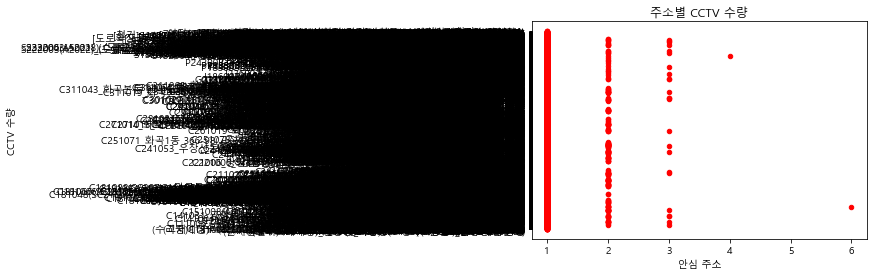

In [111]:
df.plot(kind='scatter',x='CCTV 수량',y='안심 주소',color='red')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('주소별 CCTV 수량')
plt.xlabel('안심 주소')
plt.ylabel('CCTV 수량')
plt.show()